In [1]:
import pandas as pd
from textblob import TextBlob

In [3]:
train_df=pd.read_csv("/content/train.tsv", sep='\t', nrows=1000)

In [4]:
train_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
995,996,36,heroes,3
996,997,36,of horror movies,2
997,998,36,horror movies,2
998,999,36,horror,1


####Polarity Score

In [5]:
def polarity(df):
  polarity_list=[]
  for x in range(0,df.shape[0]):
    QuantTextBlob=TextBlob(df.iloc[x][2])
    measures=QuantTextBlob.sentiment.polarity
    polarity_list.append(measures)
  df['Text Polarity']=polarity_list
  return df

In [6]:
train_df=polarity(train_df)
train_df

,PhraseId,SentenceId,Phrase,Sentiment,Text Polarity
0,1,1,A series of escapades demonstrating the adage ...,1,0.4
1,2,1,A series of escapades demonstrating the adage ...,2,0.7
2,3,1,A series,2,0.0
3,4,1,A,2,0.0
4,5,1,series,2,0.0
...,...,...,...,...,...
995,996,36,heroes,3,0.0
996,997,36,of horror movies,2,0.0
997,998,36,horror movies,2,0.0
998,999,36,horror,1,0.0


In [8]:
def add_sentiment_to_df(df):
    sentiment_tuple = []

    for x in range(0, df.shape[0]):
        QuantTextBlob = TextBlob(df.iloc[x][2])
        measures = QuantTextBlob.sentiment
        sentiment_tuple.append(measures)
    df['Text Score'] = sentiment_tuple
    return df

In [9]:
train_df = add_sentiment_to_df(train_df)
train_df

,PhraseId,SentenceId,Phrase,Sentiment,Text Polarity,Text Score
0,1,1,A series of escapades demonstrating the adage ...,1,0.4,"(0.39999999999999997, 0.38125000000000003)"
1,2,1,A series of escapades demonstrating the adage ...,2,0.7,"(0.7, 0.6000000000000001)"
2,3,1,A series,2,0.0,"(0.0, 0.0)"
3,4,1,A,2,0.0,"(0.0, 0.0)"
4,5,1,series,2,0.0,"(0.0, 0.0)"
...,...,...,...,...,...,...
995,996,36,heroes,3,0.0,"(0.0, 0.0)"
996,997,36,of horror movies,2,0.0,"(0.0, 0.0)"
997,998,36,horror movies,2,0.0,"(0.0, 0.0)"
998,999,36,horror,1,0.0,"(0.0, 0.0)"


In [7]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer as vad
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [10]:
train_df_2=pd.read_csv('/content/train.tsv', sep='\t', nrows=1000)

In [13]:
sentiment = vad()
sen=['Positive','Negative','Neutral']
sentiments = [sentiment.polarity_scores(i) for i in train_df_2['Phrase'].values]
train_df_2['Negative Score']=[i['neg'] for i in sentiments]
train_df_2['Positive Score'] = [i['pos'] for i in sentiments]
train_df_2['Neutral Score'] = [i['neu'] for i in sentiments]
train_df_2['Compound Score'] = [i['compound'] for i in sentiments]
score = train_df_2['Compound Score'].values
t = []

for i in score:
    if i >= 0.05 :
        t.append('Positive')
    elif i <= -0.05:
        t.append('Negative')
    else:
        t.append('Neutral')
train_df_2['Overall Sentiment'] = t

<Axes: xlabel='count', ylabel='Overall Sentiment'>

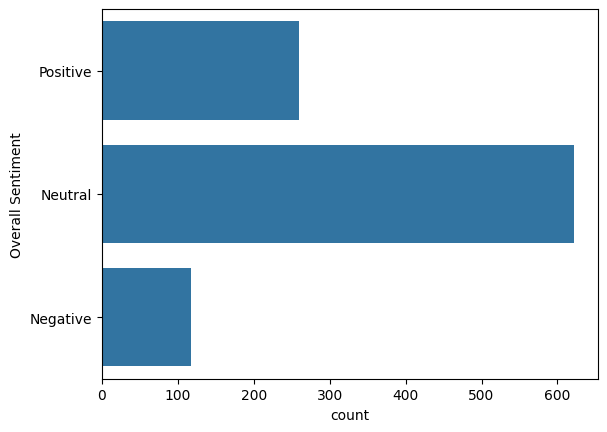

In [14]:
import seaborn as sns
sns.countplot(train_df_2['Overall Sentiment'])
